*7.27.2023*

<div class="alert alert-block alert-info">
<center><h1><b> Datathon Initial Category Exploratory Data Analysis / Data Understanding </b></h1></center>

<br/> 


Objectives:

    *   Understand the data with a) Descriptive/Summary Statistics and b) Data Visualization (graphs/charts/tables)
    *   Determine if data makes sense
    *   Identify data patterns/trends/gain insights    
    *   Identify key Vars
    *   Determine if data wrangling/cleaning/scrub is needed (identify imperfections/probls in the data)
    

</div>

***

### Imports and dataset pull

> Getting started

In [ ]:
pip install pandas pyarrow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pyarrow

datathon_metadata_pkt_file = "/Users/dslab/Downloads/reviews_sample_1p.parquet"
#mds = pd.read_parquet(datathon_metadata_pkt_file, engine='fastparquet')
nmds = pd.read_parquet(datathon_metadata_pkt_file, engine='pyarrow')

#import pyarrow.parquet as pq
#df = pq.read_table(source='c:Users/dslab/Downloads/reviews_sample_1p.parquet').to_pandas()


In [24]:
import pyarrow

datathon_metadata_pkt_file = "/Users/dslab/Downloads/metadata_sample_1p.parquet"

jmds = pd.read_parquet(datathon_metadata_pkt_file, engine='pyarrow')

#import pyarrow.parquet as pq
#df = pq.read_table(source='c:Users/dslab/Downloads/reviews_sample_1p.parquet').to_pandas()

In [25]:
jmds.head(2)

,also_buy,also_view,asin,brand,category,date,description,details,feature,fit,image,main_cat,price,rank,similar_item,tech1,tech2,title
0,[],[],B00JZHD3A8,CLELO,"[Electronics, Computers & Accessories, Laptop ...","<div class=""a-fixed-left-grid a-spacing-none"">...",[<br />This messenger bag adopts finished prod...,"{' Item Weight: ': None, ' Packag...",[Made by high quality canvas and Genuine cow l...,,[https://images-na.ssl-images-amazon.com/image...,"<img src=""https://images-na.ssl-images-amazon....",,"3,184,696 in Clothing, Shoes & Jewelry (",,,,CLELO Casual Canvas Messenger Shoulder Tote Ba...
1,[],[],B00JZHITV6,AreTop,"[Electronics, Computers & Accessories, Data St...","April 28, 2014",[<br>Capacity: 8GB <br>Shape: Rectangular <br>...,"{' Item Weight: ': None, ' Packag...","[Fair Price with Genuine Capacity, Interface:U...",,[https://images-na.ssl-images-amazon.com/image...,Computers,,"["">#25,024 in Computers & Accessories > Data S...",,,,8GB Mini USB Flash Drive Transparent Pink Glas...


In [28]:
jmds['main_cat'].value_counts()

<img src="https://images-na.ssl-images-amazon.com/images/G/01/nav2/images/gui/amazon-fashion-store-new._CB520838675_.png" class="nav-categ-image" alt="AMAZON FASHION"/>     28740
Amazon Home                                                                                                                                                                  20188
Books                                                                                                                                                                        20079
Buy a Kindle                                                                                                                                                                 20000
Tools & Home Improvement                                                                                                                                                     16020
Automotive                                                                                               

In [4]:
nmds.head(2)

,asin,overall,reviewText,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote,image
0,B00CGYCNZI,4.0,I have used Panasonic and GE earlier as my cor...,AOZOE2033AQK,Ramesh,"{""Style:"":"" 2 Handset""}",Worth the Value and Love it..,1472342400,true,None,None
1,B000V8CZYA,2.0,"The sound quality is great, but a bit of cosme...",A1AJFYLPI8M1LI,Buyer in Texas,None,"Expensive, hard to navigate menus",1196553600,true,None,None


In [5]:
nmds.shape

(1499752, 11)

## Before stats Examine the DataFrame 
#### (object for fast/efficient d manipulation)

<br/>

> 1. Check head and tail

> 2. Review data types

> 3. Dimension shape

> 4. Identify missing data


In [6]:
nmds.head(3)

,asin,overall,reviewText,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote,image
0,B00CGYCNZI,4.0,I have used Panasonic and GE earlier as my cor...,AOZOE2033AQK,Ramesh,"{""Style:"":"" 2 Handset""}",Worth the Value and Love it..,1472342400,true,None,None
1,B000V8CZYA,2.0,"The sound quality is great, but a bit of cosme...",A1AJFYLPI8M1LI,Buyer in Texas,None,"Expensive, hard to navigate menus",1196553600,true,None,None
2,B00CGYCNZI,2.0,did not last very long no longer working,A2X5NQN9TH9UUX,rufino maduena,"{""Style:"":"" 2 Handset""}",Two Stars,1471996800,true,None,None


In [7]:
nmds.tail(3)

,asin,overall,reviewText,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote,image
55930,B00GTU2WJ2,5.0,"Love the weight and length of this product, it...",A3HH4SFN5P4W6H,StephyG,None,practical and pretty,1392422400,false,None,None
55931,0356500624,5.0,Patricia has us following Mercy through numero...,A36LAGWPKOKH1R,Elaine Hopkins,"{""Format:"":"" Kindle Edition""}",Mercy in a familiar situation,1394496000,false,None,None
55932,B00GTU2WJ2,5.0,I was a little worried at first that the grate...,A2PNIJMDXGD9WI,Chrystal Mahan,None,Another Utensil to Add to My Collection,1391990400,false,None,None


In [8]:
nmds.shape

(1499752, 11)

In [9]:
nmds.dtypes

asin              object
overall           object
reviewText        object
reviewerID        object
reviewerName      object
style             object
summary           object
unixReviewTime    object
verified          object
vote              object
image             object
dtype: object

In [10]:
nmds.isna().sum()

asin                    0
overall                 0
reviewText            874
reviewerID              0
reviewerName           75
style              489530
summary               434
unixReviewTime          0
verified                0
vote              1267083
image             1477512
dtype: int64

### Initial observations

***

- We are going to need transformations as all items are data type Object(strings).
- We shall drop the column [image] at Reviews per low information gain (most are NaN values)


In [11]:
# Per low numeric values few data available describing

nmds.describe(include="all")

,asin,overall,reviewText,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote,image
count,1499752,1499752,1498878,1499752,1499677,1010222,1499318,1499752,1499752,232669,22240
unique,129876,5,1386614,1300682,848318,36302,835518,7476,2,443,22181
top,B00571F26Y,5.0,Great,A2F6N60Z96CAJI,Amazon Customer,"{""Format:"":"" Kindle Edition""}",Five Stars,1461024000,true,2,"[""88""]"
freq,6114,942098,2719,136,110843,277609,248136,1902,1196297,79233,9


In [12]:
nmds["asin"].value_counts()

B00571F26Y    6114
0349403759    5196
1463717091    4848
B0002UPGOI    4400
B00M0DGBRQ    4244
              ... 
B00GO1SFB0       1
B000I97FCY       1
1974318524       1
B00GO3KL9C       1
0841608792       1
Name: asin, Length: 129876, dtype: int64

In [13]:
nmds["asin"].max()

'B01HJ8KWDU'

In [14]:
nmds["asin"].min()

'0000000116'

In [15]:
nmds["overall"].value_counts()

5.0    942098
4.0    249879
3.0    118182
1.0    117964
2.0     71629
Name: overall, dtype: int64

In [16]:
overallcol = nmds["overall"]

In [17]:
overallcol.head(1)

0    4.0
Name: overall, dtype: object

In [18]:
overallcol = overallcol.sort_values()

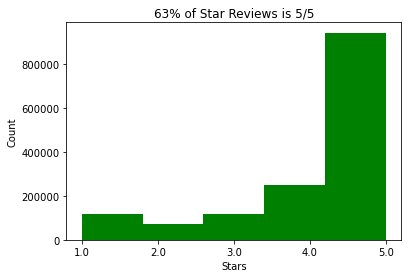

In [19]:
# Create Univariate Histrogram 

import matplotlib as plt
from matplotlib import pyplot

#%matplotlib line
plt.pyplot.hist(overallcol, bins=5, color = 'green'); 

plt.pyplot.xlabel("Stars");
plt.pyplot.ylabel("Count");
plt.pyplot.title("63% of Star Reviews is 5/5");

In [20]:
nmds["overall"].describe()

count     1499752
unique          5
top           5.0
freq       942098
Name: overall, dtype: object

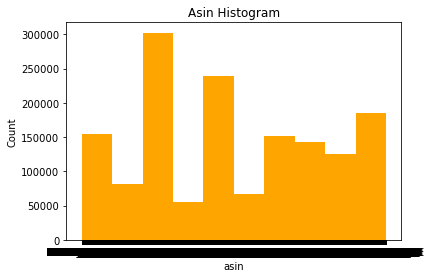

In [22]:
# Create Univariate Histrogram 

import matplotlib as plt
from matplotlib import pyplot

#%matplotlib line
plt.pyplot.hist(nmds["asin"], bins=10, color = 'orange'); 

plt.pyplot.xlabel("asin");
plt.pyplot.ylabel("Count");
plt.pyplot.title("Asin Histogram");


In [23]:
nmds["verified"].value_counts()

true     1196297
false     303455
Name: verified, dtype: int64